# Computing impacts with various explainers

In [1]:
import sys
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

sys.path.append("../..")
import timexplain as tx
import experiments.base as ex

Using TensorFlow backend.
The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


In [2]:
# this functionality added with the future versions of sktime
from sktime.utils.data_processing import (
    from_3d_numpy_to_2d_array,
    from_3d_numpy_to_nested,
    from_nested_to_2d_array,
    from_2d_array_to_nested,
    from_nested_to_3d_numpy,
    from_nested_to_long,
    #from_long_to_nested,
    #from_multi_index_to_3d_numpy,
    #from_3d_numpy_to_multi_index,
    #from_multi_index_to_nested,
    #from_nested_to_multi_index,
    #are_columns_nested,
    is_nested_dataframe,
)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [3]:
import os
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe, load_from_arff_to_dataframe

#DATA_PATH = os.path.join(os.path.dirname(sktime.__file__), "datasets/data")
DATA_PATH = os.path.join(os.path.dirname("C:\\Users\\rbabayev\\Desktop\\"), "Multivariate_ts")
#RESULTS_PATH = "results"

## Load the UCR FaceFour dataset

In [4]:
X_train, y_train, X_test, y_test = ex.dataset("ucr", "FaceFour")

# X_train, y_train = load_from_tsfile_to_dataframe(
#     os.path.join(DATA_PATH, "AtrialFibrillation/AtrialFibrillation_TRAIN.ts")
# )
# X_test, y_test = load_from_tsfile_to_dataframe(
#     os.path.join(DATA_PATH, "AtrialFibrillation/AtrialFibrillation_TEST.ts")
# )


size_x = X_train.shape[1]


type(X_train)

numpy.ndarray

## Select a time series from the test set as specimen

In [5]:
specimen_idx = 1
x_specimen = X_test[specimen_idx]
y_specimen = y_test[specimen_idx]

## Fit various models and check their prediction of the specimen

In [6]:
print("True class:", y_specimen)

True class: 1


In [7]:
st = ex.classifiers.ShapeletTransformClassifier(time_contract_in_mins=0.5) #(time_limit_in_mins=0.5)
st.fit(X_train, y_train)
print("ST prediction:", st.predict(x_specimen[np.newaxis])[0])

0.3950231075286865
0.39702939987182617
0.40902137756347656
0.4130263328552246
0.415024995803833
0.442030668258667
0.45202088356018066
0.5120360851287842
ST prediction: 1


In [8]:
sax_vsm = ex.classifiers.SAXVSMEnsembleClassifier(n_bins=[6, 8, 12, 16, 20], window_size=[6, 8, 12, 16, 20], strategy=["uniform"])
sax_vsm.fit(X_train, y_train)
print("SAX-VSM prediction:", sax_vsm.predict(x_specimen[np.newaxis])[0])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

SAX-VSM prediction: 4


In [9]:
weasel = ex.classifiers.WEASELEnsembleClassifier(window_sizes=np.arange(0.05, 1.05, 0.05), word_size=[2, 4, 6], norm_mean=[True, False])
weasel.fit(X_train, y_train)
print("WEASEL prediction:", weasel.predict(x_specimen[np.newaxis])[0])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

WEASEL prediction: 1


In [10]:
# rotf = ex.classifiers.RotationForestClassifier()
# rotf.fit(X_train, y_train)
# print("RotF prediction:", rotf.predict(x_specimen[np.newaxis])[0])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [11]:
tsf = ex.classifiers.TimeSeriesForestClassifier(n_estimators=100, random_state=1)
tsf.fit(X_train, y_train)
print("TSF prediction:", tsf.predict(x_specimen[np.newaxis])[0])

TSF prediction: 1


In [28]:
rise = ex.classifiers.RISEClassifier(n_estimators=100, random_state=1)
rise.fit(X_train, y_train)
print("RISE prediction:", rise.predict(x_specimen[np.newaxis])[0])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


RISE prediction: 1


In [12]:
resnet = ex.classifiers.Resnet()
resnet.fit(X_train, y_train, epochs=20)
print("ResNet prediction:", resnet.predict(x_specimen[np.newaxis])[0])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
tostring() is deprecated. Use tobytes() instead.
Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use


ResNet prediction: 4


## Explain the predictions of the specimen using various explainers

First, explain _ST_, _SAX-VSM_, _RotF_, and _ResNet_ using model-agnostic _timeXplain_ equipped with the time slice mapping with sample replacement.
Apart from sample replacement (which is the default), all other replacements mentioned in the paper are available in the `tx.om` module.

In [13]:
time_om = tx.om.TimeSliceOmitter(size_x, time_slicing=30, x_repl=tx.om.x_sample)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [14]:
st_expl_agnostic      = tx.om.KernelShapExplainer(time_om, st.predict_proba, X_bg=X_test, y_bg=y_test,
                                                  n_samples=500, n_builds=5, bgcs=True).explain(x_specimen)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [15]:
sax_vsm_expl_agnostic = tx.om.KernelShapExplainer(time_om, sax_vsm.predict_proba, X_bg=X_test, y_bg=y_test,
                                                  n_samples=500, n_builds=5, bgcs=True).explain(x_specimen)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# rotf_expl_agnostic    = tx.om.KernelShapExplainer(time_om, rotf.predict_proba, X_bg=X_test, y_bg=y_test,
#                                                   n_samples=500, n_builds=5, bgcs=True).explain(x_specimen)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [17]:
tsf_expl_agnostic = tx.om.KernelShapExplainer(time_om, tsf.predict_proba, X_bg=X_test, y_bg=y_test,
                                                  n_samples=500, n_builds=5, bgcs=True).explain(x_specimen)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
rise_expl_agnostic = tx.om.KernelShapExplainer(time_om, rise.predict_proba, X_bg=X_test, y_bg=y_test,
                                                  n_samples=500, n_builds=5, bgcs=True).explain(x_specimen)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [18]:
resnet_expl_agnostic  = tx.om.KernelShapExplainer(time_om, resnet.predict_proba, X_bg=X_test, y_bg=y_test,
                                                  n_samples=500, n_builds=5, bgcs=True).explain(x_specimen)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Next, explain _WEASEL_ using model-agnostic _timeXplain_ equipped witht the frequency band mapping with the patch strategy.
Alternatively, one may use the filter strategy, which is available as `tx.om.FreqDiceFilterOmitter`.

In [19]:
freq_om = tx.om.FreqDicePatchOmitter(size_x, time_slicing=15, freq_slicing=5)

weasel_expl_agnostic  = tx.om.KernelShapExplainer(freq_om, weasel.predict_proba, X_bg=X_test, y_bg=y_test,
                                                 n_samples=500, n_builds=5, bgcs=True).explain(x_specimen)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Now, we explain all classifiers with model-specific approaches.
Namely, _ST_ ist explained via _shapelet superposition_, _SAX-VSM_ via _SAX window superposition_ (in the time domain), _WEASEL_ via _SFA window superposition_ (in the frequency domain), _RotF_ via _TreeSHAP_, and _ResNet_ via _class activation maps_.
Superposition is implemented by the `>>` operator.
For the superposition methods, we do not employ _divide_spread_ because that would produce more technically faithful, yet less human-interpretable impacts.

In [20]:
X_specimen_sktime = st["transform"].transform(x_specimen[np.newaxis])

st_expl_specific      = (tx.spec.ShapeletTransformExplainer(st["st"]) >> tx.spec.TreeShapExplainer(st["rf"])) \
                            .explain(X_specimen_sktime)[0]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing


In [21]:
sax_vsm_expl_specific = tx.MeanExplainer([tx.spec.SaxVsmWordSuperposExplainer(sub["sax_vsm"])
                                          for sub in sax_vsm.estimators_]) \
                            .explain(x_specimen)

In [22]:
weasel_expl_specific  = tx.MeanExplainer([tx.spec.WeaselExplainer(sub["weasel"], domain="freq") >>
                                          tx.spec.LinearShapExplainer(sub["logreg"], X_bg=sub["weasel"].transform(X_test))
                                          for sub in weasel.estimators_]) \
                            .explain(x_specimen)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [23]:
# rotf_expl_specific    = tx.spec.TreeShapExplainer(rotf, X_bg=X_test).explain(x_specimen)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [24]:
X_specimen_keras = resnet.prepare_X(x_specimen[np.newaxis])
resnet_expl_specific  = tx.spec.NeuralCamExplainer(resnet.estimator).explain(X_specimen_keras)[0]

Note that we do not demonstrate the statistic mapping here because all of our UCR demo data sets are z-normalized to mean 0 and standard deviation 1. Hence, the statistics of a time series are not used by any model, causing all statistic impacts to always be 0. You can try this out with _timeXplain_ and verify it.

## Plot the impacts towards the true class of the specimen

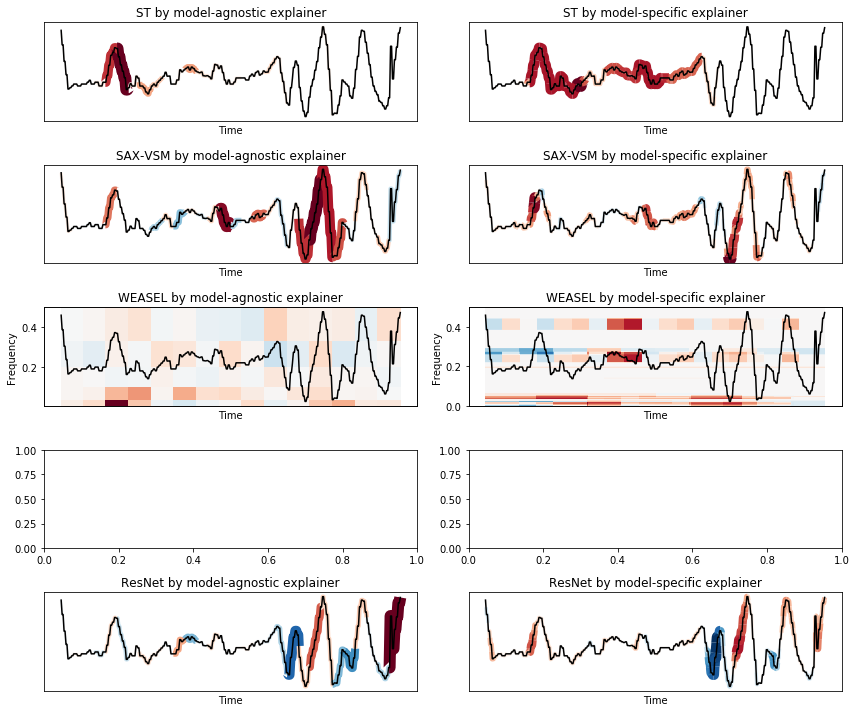

In [25]:
fig, axs = plt.subplots(5, 2, figsize=(12, 10))

def plot1d(ax, expl, title):
    ax.set_title(title)
    tx.plot.saliency1d(expl, ax=ax, model_output=y_specimen - 1, slice_edge_style=None, legend_style=None, impact_legend=None)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

def plot2d(ax, expl, title):
    ax.set_title(title)
    tx.plot.saliency2d(expl, ax=ax, model_output=y_specimen - 1, dice_edge_style=None, legend_style=None, impact_legend=None)
    ax.xaxis.set_ticks([])

plot1d(axs[0, 0], st_expl_agnostic, "ST by model-agnostic explainer")
plot1d(axs[0, 1], st_expl_specific, "ST by model-specific explainer")

plot1d(axs[1, 0], sax_vsm_expl_agnostic, "SAX-VSM by model-agnostic explainer")
plot1d(axs[1, 1], sax_vsm_expl_specific, "SAX-VSM by model-specific explainer")

plot2d(axs[2, 0], weasel_expl_agnostic, "WEASEL by model-agnostic explainer")
plot2d(axs[2, 1], weasel_expl_specific, "WEASEL by model-specific explainer")

# plot1d(axs[3, 0], rotf_expl_agnostic, "RotF by model-agnostic explainer")
# plot1d(axs[3, 1], rotf_expl_specific, "RotF by model-specific explainer")

plot1d(axs[4, 0], resnet_expl_agnostic, "ResNet by model-agnostic explainer")
plot1d(axs[4, 1], resnet_expl_specific, "ResNet by model-specific explainer")

fig.tight_layout()